<a href="https://colab.research.google.com/github/EngOmarElsayed/HeartDiseaseNoteBook/blob/main/HeartDisease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Needed library

In [1]:
## Import Librarys
import tensorflow as tf
print("tf version: ", tf.version.VERSION)

tf version:  2.15.0


In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Load DataSet

In [4]:
dataSet = pd.read_csv("../content/heart_statlog_cleveland_hungary_final.csv")
dataSet.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


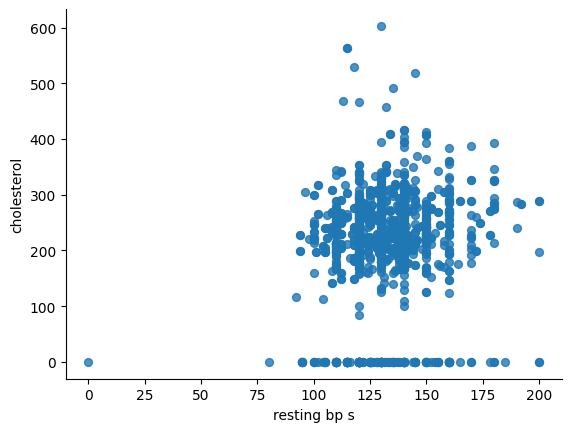

In [8]:
# @title resting bp s vs cholesterol
dataSet.plot(kind='scatter', x='resting bp s', y='cholesterol', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

From The graph we can see that there is zero values in the cholesterol & resting bp which is not possible. This is one of the problems to be tackled in the data preparation.

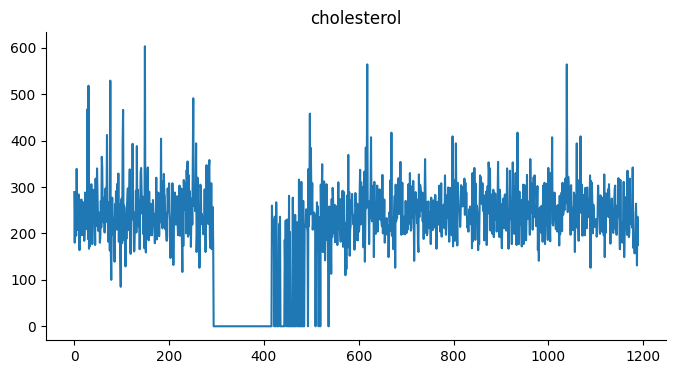

In [9]:
# @title cholesterol
dataSet['cholesterol'].plot(kind='line', figsize=(8, 4), title='cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

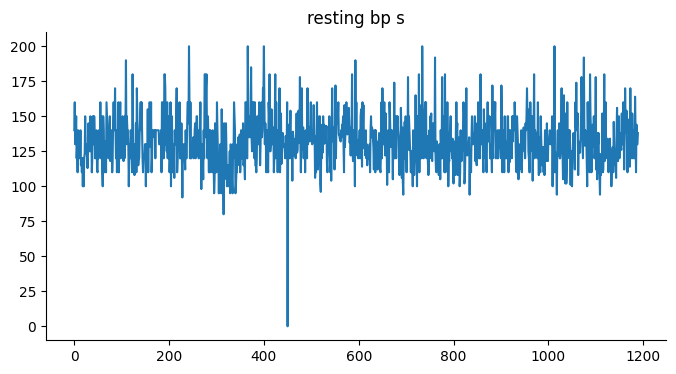

In [10]:
# @title resting bp s
dataSet['resting bp s'].plot(kind='line', figsize=(8, 4), title='resting bp s')
plt.gca().spines[['top', 'right']].set_visible(False)

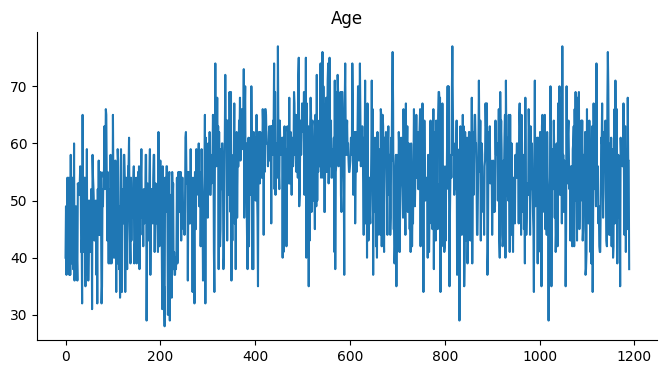

In [17]:
# @title Age
dataSet['age'].plot(kind="line", figsize=(8, 4), title= "Age")
plt.gca().spines[['top', 'right']].set_visible(False)